In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Reading restaurants data
data_path = 'C:/Users/Kartikay/Documents/zomato.csv'
from pandas import read_csv

df= read_csv(data_path)

# Results
print(f'Dataset shape: {df.shape}')
df.head()

Dataset shape: (51717, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


    An overview from the data

In [3]:
#df.info()

In [4]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [5]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na    #OR appending values using for loop

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [6]:
#% of missing values
import numpy as np
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate has 15.0337 % missing values
phone has 2.3358 % missing values
location has 0.0406 % missing values
rest_type has 0.4389 % missing values
dish_liked has 54.2916 % missing values
cuisines has 0.087 % missing values
approx_cost(for two people) has 0.669 % missing values


In [7]:
##        Pre-Processing and Removing duplicate files

# Making a copy of the data to work on
data = df.copy()

In [8]:
# Dropping duplicates -

In [9]:
#Lets aggregate data of listed_in(type) into list

grouped=data.groupby(["name", "address"]).agg({"listed_in(type)" : list})
grouped

listed_in(type)
name                                         address                                                                                              
#FeelTheROLL                                 Opposite Mantri Commercio, Outer Ring Road, Dev...                               [Delivery, Delivery]
#L-81 Cafe                                   Sector 6, HSR Layout, HSR                           [Delivery, Dine-out, Delivery, Dine-out, Deliv...
#Vibes Restro                                Marasur Gate, Chandapura - Anekal Road, Near Al...                       [Buffet, Delivery, Dine-out]
#refuel                                      7, Ground Floor, RR Commercial Complex, Akshay ...                        [Cafes, Delivery, Dine-out]
'Brahmins' Thatte Idli                       19, 1st main, 2nd cross, 3rd stage, 3rd block, ...                                         [Dine-out]
...                                                                                                                                            ...
nu.tree                                      47/7 First floor, DoddaThogur Road, Near Velank...                                         [Delivery]
                                             Ground Floor-Lobby Area, Brigade IRV Centre, Na...                     [Delivery, Delivery, Delivery]
re:cess - Hilton Bangalore Embassy GolfLinks Hilton Bangalore Embassy GolfLinks, Embassy Gol...                [Dine-out, Dine-out, Pubs and bars]
repEAT Hub                                   67/4, Bhoganahalli Road, JCR Layout, Panathur, ...                               [Delivery, Dine-out]
sCoolMeal                                    197/293-3, 32nd Main, 1st Stage, BTM, Bangalore     [Delivery, Delivery, Delivery, Delivery, Deliv...

[12499 rows x 1 columns]

In [10]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [11]:
#merge your both the dataframe
newdata = pd.merge(grouped, data, on = (["name", "address"]))

In [12]:
#newdata.columns

In [13]:
#newdata['listed_in(type)_y'].dtype

In [14]:
#newdata.shape (51717,18)

In [15]:
newdata.drop_duplicates(subset = ["name", "address", "listed_in(type)_y"], inplace = True)

In [16]:
#newdata.shape(20915, 18)

In [17]:
# resetting your index
newdata = newdata.reset_index(drop = True)

In [18]:
newdata.head()

,name,address,listed_in(type)_x,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)_y,listed_in(city)
0,#FeelTheROLL,"Opposite Mantri Commercio, Outer Ring Road, De...","[Delivery, Delivery]",https://www.zomato.com/bangalore/feeltheroll-b...,No,No,3.4/5,7,+91 9108342079\r\n+91 9886117901,Bellandur,Quick Bites,NaN,Fast Food,200,"[('Rated 5.0', ""RATED\n Had an egg chicken ro...",[],Delivery,Bellandur
1,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Delivery,BTM
2,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Dine-out,BTM
3,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,NaN,"Continental, Chinese, Italian",700,"[('Rated 5.0', ""RATED\n Great service and don...",[],Buffet,Electronic City
4,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,NaN,"Continental, Chinese, Italian",700,"[('Rated 5.0', ""RATED\n Great service and don...",[],Delivery,Electronic City


In [19]:
newdata.shape

(20915, 18)

In [20]:
##       Perform Discretisation to ready your Target Feature

In [21]:
newdata['rate'].unique() 

array(['3.4/5', '3.9/5', nan, '3.7/5', '3.2/5', '3.5/5', '4.6/5', '4.1/5',
       '4.2 /5', '4.3 /5', '4.2/5', '4.0/5', '4.0 /5', '3.9 /5', '4.1 /5',
       '3.7 /5', '4.3/5', '3.1 /5', '3.6/5', '3.1/5', '3.3/5', '3.0/5',
       '3.5 /5', '4.4/5', '4.5 /5', 'NEW', '3.3 /5', '3.8/5', '3.2 /5',
       '3.6 /5', '4.5/5', '3.8 /5', '3.4 /5', '2.7/5', '2.7 /5', '2.8/5',
       '3.0 /5', '2.9/5', '2.5 /5', '2.9 /5', '2.8 /5', '4.9/5', '4.7/5',
       '4.8/5', '4.8 /5', '4.4 /5', '1.8/5', '2.4/5', '2.1/5', '2.5/5',
       '-', '2.2/5', '4.7 /5', '2.6/5', '4.6 /5', '4.9 /5', '2.3/5',
       '2.0 /5', '2.3 /5', '2.6 /5', '2.4 /5', '2.0/5'], dtype=object)

In [22]:
#newdata['rate'].dtype    0   

In [23]:
# Transforming the ratings column 
newdata["rating"] = newdata["rate"].str[:3] # Extracting the first three characters of each string in "rate"

In [24]:
newdata["rating"].replace('NEW',0,inplace=True)
newdata["rating"].replace('-',0,inplace=True)

In [25]:
# Converting ratings to a numeric column so we can discretize it
newdata["rating"] = pd.to_numeric(newdata["rating"])

In [26]:
#newdata['rate'].dtype      float64

In [27]:
# Discretizing the ratings into a categorical feature with 4 levels
## ie if less than 3, assign 0
## ie if less than 3.5, assign 1
## ie if less than 4.0, assign 2
## ie if less than 5.o assign 3

## We can think of these as 0-Very Low, 1-Low, 2-Medium and 3-High.

In [28]:
#newdata["rating"].head()

In [29]:
newdata['rating'].unique()

array([3.4, 3.9, nan, 3.7, 3.2, 3.5, 4.6, 4.1, 4.2, 4.3, 4. , 3.1, 3.6,
       3.3, 3. , 4.4, 4.5, 0. , 3.8, 2.7, 2.8, 2.9, 2.5, 4.9, 4.7, 4.8,
       1.8, 2.4, 2.1, 2.2, 2.6, 2.3, 2. ])

In [30]:
#newdata.isnull().sum()

In [31]:
#newdata.shape (20915, 19)

In [32]:
## bins = [1, 3.25, 4.1, 5.0]
## it means if it is b/w 1 to 3.25, assign label as 0
## if b/w 3.25 to 4.1, assign label as 1 & so on------

newdata["rating"]=pd.cut(newdata["rating"], bins = [1, 3.25, 4.1, 5.0], labels = ["0", "1", "2"])

<AxesSubplot:xlabel='rating', ylabel='count'>

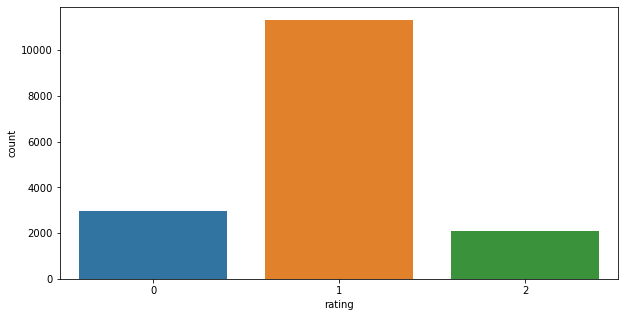

In [33]:
# Visualizing the rating class distribution
plt.figure(figsize = (10, 5))
sns.countplot(newdata["rating"])

#To check the imbalance(majority and minority in data)

In [34]:
##       Prepare your review list feature using regular expressions
# Summary statistics
newdata.describe(include = "all")

,name,address,listed_in(type)_x,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)_y,listed_in(city),rating
count,20915,20915,20915,20915,20915,20915,17532,20915.000000,20516,20903,20809,8916,20892,20817,20915,20915,20915,20915,16391
unique,8792,11495,927,20915,2,2,61,NaN,11999,93,93,4502,2630,70,12660,3693,7,30,3
top,Cafe Coffee Day,Delivery Only,"[Delivery, Dine-out]",https://www.zomato.com/bangalore/andhra-chetti...,Yes,No,3.9/5,NaN,080 43334333,Whitefield,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM,1
freq,78,36,2418,1,11605,18615,1181,NaN,93,1462,8007,78,1174,3005,3524,16766,9355,2379,11321
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.105427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,741.954538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
newdata['reviews_list'][0]

'[(\'Rated 5.0\', "RATED\\n  Had an egg chicken roll and a paneer roll... Really yummy... A must visit place... It would be good if you guys can keep the shop open on Sunday\'s as well.. Good luck... :-)"), (\'Rated 5.0\', \'RATED\\n  Not just the Roll but the filling tastes great. I would highly recommend to others to try their rolls. Owners hospitality is also good and very friendly.\'), (\'Rated 4.5\', \'RATED\\n  Very nice place complete value for money ? Highly recommend.Must visit for any foodie . I would recommend the egg chicken roll . #feeltheroll\'), (\'Rated 5.0\', \'RATED\\n  Had an amazing mouth-watering ?chicken roll?Worth every bite..A must try for every foodie?A variety of rolls and sandwiches are available as well .. A budding rafflesia ?\')]'

In [36]:
rev=newdata['reviews_list'][0].lower()
rev

'[(\'rated 5.0\', "rated\\n  had an egg chicken roll and a paneer roll... really yummy... a must visit place... it would be good if you guys can keep the shop open on sunday\'s as well.. good luck... :-)"), (\'rated 5.0\', \'rated\\n  not just the roll but the filling tastes great. i would highly recommend to others to try their rolls. owners hospitality is also good and very friendly.\'), (\'rated 4.5\', \'rated\\n  very nice place complete value for money ? highly recommend.must visit for any foodie . i would recommend the egg chicken roll . #feeltheroll\'), (\'rated 5.0\', \'rated\\n  had an amazing mouth-watering ?chicken roll?worth every bite..a must try for every foodie?a variety of rolls and sandwiches are available as well .. a budding rafflesia ?\')]'

In [37]:
import re
rev2=re.sub('[^a-zA-Z]', ' ',rev)  #substitute except a-z
rev2

'   rated        rated n  had an egg chicken roll and a paneer roll    really yummy    a must visit place    it would be good if you guys can keep the shop open on sunday s as well   good luck             rated        rated n  not just the roll but the filling tastes great  i would highly recommend to others to try their rolls  owners hospitality is also good and very friendly       rated        rated n  very nice place complete value for money   highly recommend must visit for any foodie   i would recommend the egg chicken roll    feeltheroll      rated        rated n  had an amazing mouth watering  chicken roll worth every bite  a must try for every foodie a variety of rolls and sandwiches are available as well    a budding rafflesia     '

In [38]:
rev3=re.sub('rated', ' ',rev2)
rev3

'              n  had an egg chicken roll and a paneer roll    really yummy    a must visit place    it would be good if you guys can keep the shop open on sunday s as well   good luck                        n  not just the roll but the filling tastes great  i would highly recommend to others to try their rolls  owners hospitality is also good and very friendly                  n  very nice place complete value for money   highly recommend must visit for any foodie   i would recommend the egg chicken roll    feeltheroll                 n  had an amazing mouth watering  chicken roll worth every bite  a must try for every foodie a variety of rolls and sandwiches are available as well    a budding rafflesia     '

In [39]:
rev4=re.sub('x',' ',rev3)
rev4

'              n  had an egg chicken roll and a paneer roll    really yummy    a must visit place    it would be good if you guys can keep the shop open on sunday s as well   good luck                        n  not just the roll but the filling tastes great  i would highly recommend to others to try their rolls  owners hospitality is also good and very friendly                  n  very nice place complete value for money   highly recommend must visit for any foodie   i would recommend the egg chicken roll    feeltheroll                 n  had an amazing mouth watering  chicken roll worth every bite  a must try for every foodie a variety of rolls and sandwiches are available as well    a budding rafflesia     '

In [40]:
rev5=re.sub(' +',' ',rev4)   #remove multiple spaces(more than one _spaces)
rev5

' n had an egg chicken roll and a paneer roll really yummy a must visit place it would be good if you guys can keep the shop open on sunday s as well good luck n not just the roll but the filling tastes great i would highly recommend to others to try their rolls owners hospitality is also good and very friendly n very nice place complete value for money highly recommend must visit for any foodie i would recommend the egg chicken roll feeltheroll n had an amazing mouth watering chicken roll worth every bite a must try for every foodie a variety of rolls and sandwiches are available as well a budding rafflesia '

In [41]:
#newdata.shape (20915, 19)

In [42]:
##            Generate your word-cloud
sample=newdata.sample(n=2000)

In [43]:

total_review=' '
for review in sample['reviews_list']:
    review=review.lower()
    review=re.sub('[^a-zA-Z]', ' ',review)
    review=re.sub('rated', ' ',review)
    review=re.sub('x',' ',review)
    review=re.sub(' +',' ',review)
    total_review=total_review + str(review)
 

In [44]:
## generate wordcloud
import wordcloud
from wordcloud import WordCloud,STOPWORDS

In [45]:
stopwords=set(STOPWORDS)   #a,an,he,she,it,must (no sense words)

(-0.5, 799.5, 799.5, -0.5)

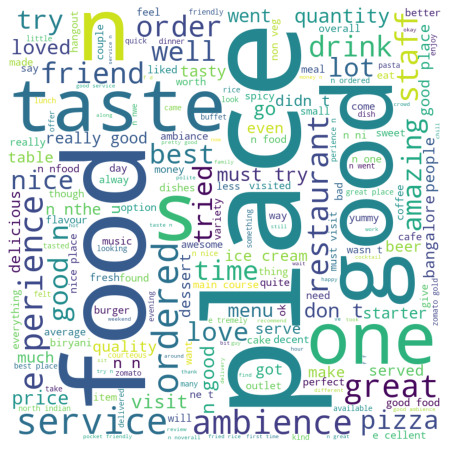

In [46]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(total_review) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 

In [47]:
##         Data Cleaning on review list

    Observations
    Of the 50 most frequent words across customer reviews, best are:     place,food,taste,ambience,good..
    The only negative word in the top 50 is "bad".

In [48]:
###but it is hard to estimate over here which words wins by how much??

    for this u can use plots/charts

In [49]:
from nltk.corpus import RegexpTokenizer as regextoken

In [50]:
# Converting all the text to lowercase
newdata["reviews_list"] = newdata["reviews_list"].apply(lambda x: x.lower())

'''
#OR
def apply_lower(x):
    return x.lower()
 newdata["reviews_list"] = newdata["reviews_list"].apply(apply_lower)
'''

'\n#OR\ndef apply_lower(x):\n    return x.lower()\n newdata["reviews_list"] = newdata["reviews_list"].apply(apply_lower)\n'

In [51]:
##  Creating a regular expression tokenizer that have only alphabets , ie it remove all the special characters
from nltk.corpus import RegexpTokenizer as regextoken
tokenizer = regextoken("[a-zA-Z]+") 

In [52]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [53]:
newdata["reviews_list"][0]

'[(\'rated 5.0\', "rated\\n  had an egg chicken roll and a paneer roll... really yummy... a must visit place... it would be good if you guys can keep the shop open on sunday\'s as well.. good luck... :-)"), (\'rated 5.0\', \'rated\\n  not just the roll but the filling tastes great. i would highly recommend to others to try their rolls. owners hospitality is also good and very friendly.\'), (\'rated 4.5\', \'rated\\n  very nice place complete value for money ? highly recommend.must visit for any foodie . i would recommend the egg chicken roll . #feeltheroll\'), (\'rated 5.0\', \'rated\\n  had an amazing mouth-watering ?chicken roll?worth every bite..a must try for every foodie?a variety of rolls and sandwiches are available as well .. a budding rafflesia ?\')]'

In [54]:
## tokenize data of very first review
print(tokenizer.tokenize(newdata["reviews_list"][0]))

['rated', 'rated', 'n', 'had', 'an', 'egg', 'chicken', 'roll', 'and', 'a', 'paneer', 'roll', 'really', 'yummy', 'a', 'must', 'visit', 'place', 'it', 'would', 'be', 'good', 'if', 'you', 'guys', 'can', 'keep', 'the', 'shop', 'open', 'on', 'sunday', 's', 'as', 'well', 'good', 'luck', 'rated', 'rated', 'n', 'not', 'just', 'the', 'roll', 'but', 'the', 'filling', 'tastes', 'great', 'i', 'would', 'highly', 'recommend', 'to', 'others', 'to', 'try', 'their', 'rolls', 'owners', 'hospitality', 'is', 'also', 'good', 'and', 'very', 'friendly', 'rated', 'rated', 'n', 'very', 'nice', 'place', 'complete', 'value', 'for', 'money', 'highly', 'recommend', 'must', 'visit', 'for', 'any', 'foodie', 'i', 'would', 'recommend', 'the', 'egg', 'chicken', 'roll', 'feeltheroll', 'rated', 'rated', 'n', 'had', 'an', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'a', 'must', 'try', 'for', 'every', 'foodie', 'a', 'variety', 'of', 'rolls', 'and', 'sandwiches', 'are', 'available', 'as', 'w

In [55]:

# Applying the tokenizer to each row of the reviews
review_tokens = newdata["reviews_list"].apply(tokenizer.tokenize)

In [56]:
# Examining the tokens created for the first row / restaurant
print(review_tokens[0])

['rated', 'rated', 'n', 'had', 'an', 'egg', 'chicken', 'roll', 'and', 'a', 'paneer', 'roll', 'really', 'yummy', 'a', 'must', 'visit', 'place', 'it', 'would', 'be', 'good', 'if', 'you', 'guys', 'can', 'keep', 'the', 'shop', 'open', 'on', 'sunday', 's', 'as', 'well', 'good', 'luck', 'rated', 'rated', 'n', 'not', 'just', 'the', 'roll', 'but', 'the', 'filling', 'tastes', 'great', 'i', 'would', 'highly', 'recommend', 'to', 'others', 'to', 'try', 'their', 'rolls', 'owners', 'hospitality', 'is', 'also', 'good', 'and', 'very', 'friendly', 'rated', 'rated', 'n', 'very', 'nice', 'place', 'complete', 'value', 'for', 'money', 'highly', 'recommend', 'must', 'visit', 'for', 'any', 'foodie', 'i', 'would', 'recommend', 'the', 'egg', 'chicken', 'roll', 'feeltheroll', 'rated', 'rated', 'n', 'had', 'an', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'a', 'must', 'try', 'for', 'every', 'foodie', 'a', 'variety', 'of', 'rolls', 'and', 'sandwiches', 'are', 'available', 'as', 'w

In [57]:
### now from this above list,we will figure out we have some stopwords, it means we have to remove these stopwords like an,and,it etc

In [58]:
##       What are stopwords and how to remove from the data
from nltk.corpus import stopwords

In [59]:
stop=stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [60]:
### we will figure out there are some more stopwords in my data, that we can add it to my stop list

In [61]:
# Adding custom words to stopwords 
stop.extend(["rated", "n", "nan", "x"])

In [62]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [63]:
### with respect to very first row, how to remove stopwords
rev=review_tokens[0]

In [64]:
print([token for token in rev if token not in stop]) #list comprehension
"""
#OR
review=[]
for token in rev:
    if token not in stop:
        review.append(token)
print(review)"""

['egg', 'chicken', 'roll', 'paneer', 'roll', 'really', 'yummy', 'must', 'visit', 'place', 'would', 'good', 'guys', 'keep', 'shop', 'open', 'sunday', 'well', 'good', 'luck', 'roll', 'filling', 'tastes', 'great', 'would', 'highly', 'recommend', 'others', 'try', 'rolls', 'owners', 'hospitality', 'also', 'good', 'friendly', 'nice', 'place', 'complete', 'value', 'money', 'highly', 'recommend', 'must', 'visit', 'foodie', 'would', 'recommend', 'egg', 'chicken', 'roll', 'feeltheroll', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'must', 'try', 'every', 'foodie', 'variety', 'rolls', 'sandwiches', 'available', 'well', 'budding', 'rafflesia']


'\n#OR\nreview=[]\nfor token in rev:\n    if token not in stop:\n        review.append(token)\nprint(review)'

In [65]:
### using function

In [66]:
def remove_stopwords(text):
    updated_text=[token for token in text if token not in stop]
    return updated_text
review_tokens=review_tokens.apply(remove_stopwords)

In [67]:
#OR
#review_tokens=review_tokens.apply(labda x:[token for token in text if token not in stop])


In [68]:
type(review_tokens)

pandas.core.series.Series

In [69]:
#print(review_tokens[0])

In [70]:
#print(review_tokens[1])

In [71]:
len(review_tokens)

20915

In [72]:
# Concatenating all the reviews as we have to count frequency of each word 
all_reviews = review_tokens.astype(str).str.cat()



In [73]:
all_reviews[0:200]

"['egg', 'chicken', 'roll', 'paneer', 'roll', 'really', 'yummy', 'must', 'visit', 'place', 'would', 'good', 'guys', 'keep', 'shop', 'open', 'sunday', 'well', 'good', 'luck', 'roll', 'filling', 'tastes'"

In [74]:
type(all_reviews)

str

In [75]:
len(all_reviews) #single list with all different reviews

129341038

In [76]:
## perform tokenization to convert your string(all_reviews) into list,so that we will count frequency of words
cleaned_reviews = tokenizer.tokenize(all_reviews)

In [77]:
len(cleaned_reviews)

13376224

In [78]:
type(cleaned_reviews)

list

In [79]:
print(cleaned_reviews[0:200])

['egg', 'chicken', 'roll', 'paneer', 'roll', 'really', 'yummy', 'must', 'visit', 'place', 'would', 'good', 'guys', 'keep', 'shop', 'open', 'sunday', 'well', 'good', 'luck', 'roll', 'filling', 'tastes', 'great', 'would', 'highly', 'recommend', 'others', 'try', 'rolls', 'owners', 'hospitality', 'also', 'good', 'friendly', 'nice', 'place', 'complete', 'value', 'money', 'highly', 'recommend', 'must', 'visit', 'foodie', 'would', 'recommend', 'egg', 'chicken', 'roll', 'feeltheroll', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'must', 'try', 'every', 'foodie', 'variety', 'rolls', 'sandwiches', 'available', 'well', 'budding', 'rafflesia', 'little', 'cafe', 'set', 'beautiful', 'location', 'ambiance', 'good', 'nthe', 'burger', 'filled', 'taste', 'chicken', 'nthe', 'banana', 'chocolate', 'sandwich', 'variety', 'would', 'never', 'find', 'restaurants', 'bangalore', 'drinks', 'wonderful', 'lot', 'flavours', 'choose', 'nit', 'took', 'little', 'time', 'expected', 'food

In [80]:
# obtain the frequency of individual words in the reviews, for this u have to use FreqDist

In [81]:
##    What is Unigram and how to perform unigram analysis
from nltk import FreqDist, bigrams, trigrams

In [82]:
fd = FreqDist()  #shift+tab to view details #automatically lower

In [83]:
for word in cleaned_reviews:
    fd[word]=fd[word]+ 1

In [84]:
# Examining the top 5 most frequent words
fd.most_common(5)

[('good', 328304),
 ('place', 317915),
 ('food', 307405),
 ('chicken', 141301),
 ('service', 109512)]

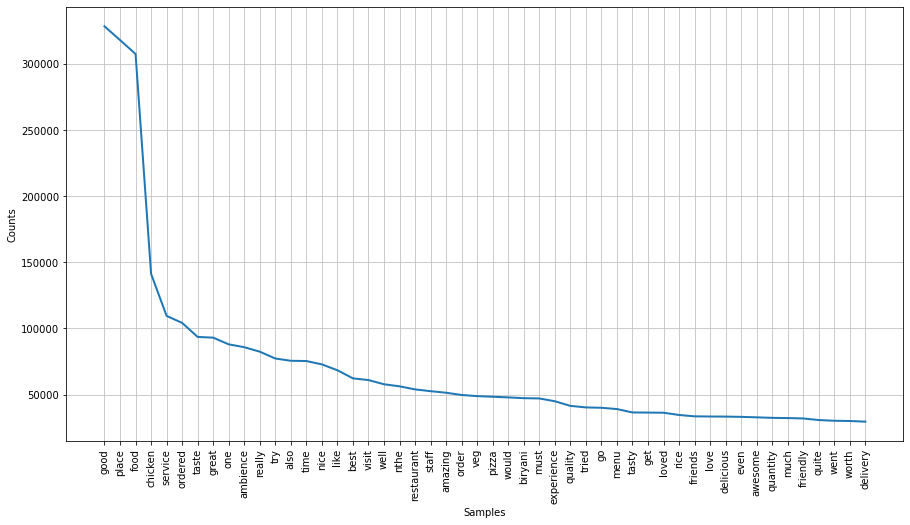

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [85]:
# Plotting the top 50 most frequent words
plt.figure(figsize = (15, 8))
fd.plot(50)

   Factors contributing to restaurant experience are mentioned in the following (descending) order of frequency:
   
   place > service > taste > ambience >time> staff > quality > menu  > quantity > friendly > delivery>.

In [86]:
##What is Bigram,Trigram and how to perform Bigram,Trigram analysis

### Bi-grams

In [87]:
##Now let us repeat the analysis on a bi-gram level. Bi-grams are pairs of words that provide better insights than individual words.

In [88]:
from nltk import bigrams

In [89]:
# Generating bigrams from the reviews
bigrams = bigrams(cleaned_reviews)


In [90]:
bigrams

<generator object bigrams at 0x00000254A07DC740>

In [91]:
## takes 
# Getting the bigram frequency distribution
fd_bigrams = FreqDist()
for bigram in bigrams:
    fd_bigrams[bigram]=fd_bigrams[bigram] + 1
    
# Examining the top 5 most frequent bigrams
fd_bigrams.most_common(5)

[(('must', 'try'), 23182),
 (('really', 'good'), 22564),
 (('good', 'food'), 21589),
 (('food', 'good'), 21175),
 (('good', 'place'), 18690)]

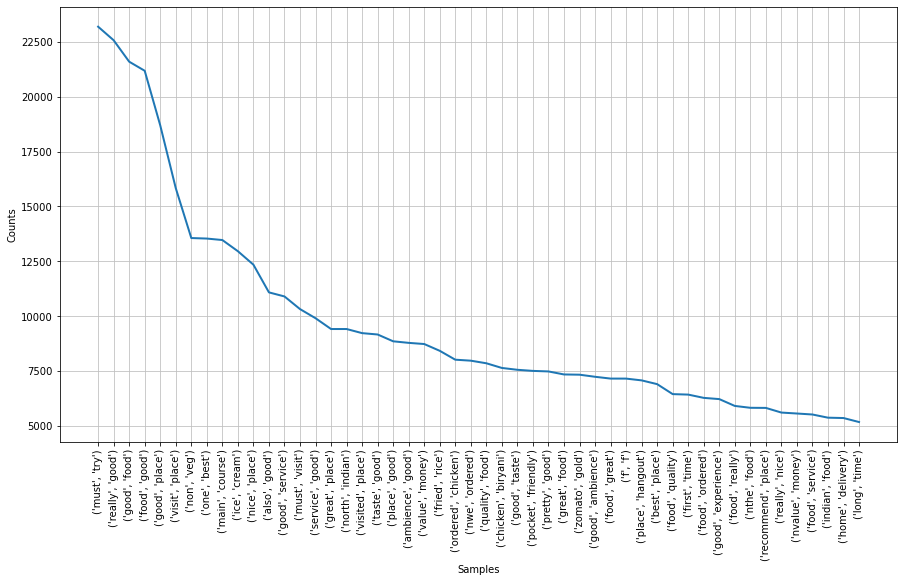

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [92]:
# Plotting the top 50 most frequent bigrams
plt.figure(figsize = (15, 8))
fd_bigrams.plot(50)


    Observations
    We have some new insights! Food items/preferences mentioned in the top 50 bigrams are non veg, ice cream, North Indian,
    chicken biryani
    Factors contributing to restaurant experience are : good food > good place > good service > value (for) money > pocket
    friendly > ambience good.

    There's a key insight here: the expense factor, which was missed by individual word frequency counts, was picked up by the bigram frequency counts.

In [93]:
#fd_bigrams.most_common(50)

    Zomato might also be happy to know their membership program "Zomato Gold" is in the top 50 bigrams, with 7340 mentions in the customer reviews.

# What about trigrams?

In [94]:
from nltk import trigrams

In [95]:
# Generating trigrams from the reviews
trigrams = trigrams(cleaned_reviews)

In [96]:
## takes 
fd_trigrams = FreqDist()
for trigram in trigrams:
    fd_trigrams[trigram] += 1

In [97]:
fd_trigrams.most_common(5)

[(('must', 'visit', 'place'), 3982),
 (('f', 'f', 'f'), 3916),
 (('veg', 'non', 'veg'), 3734),
 (('north', 'indian', 'food'), 3433),
 (('place', 'hangout', 'friends'), 2824)]

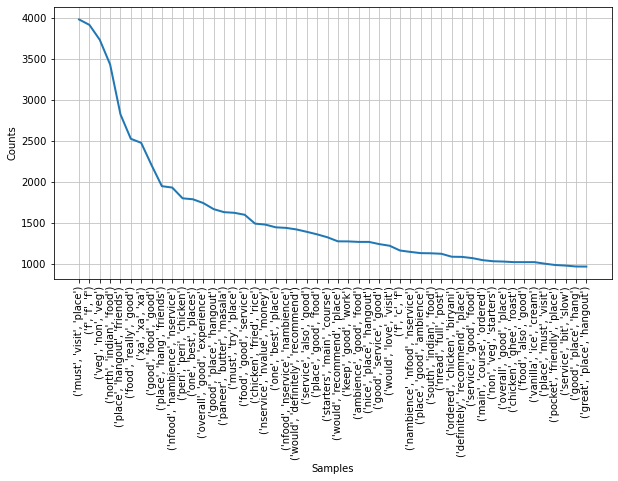

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [98]:
plt.figure(figsize = (10, 5))
fd_trigrams.plot(50)


    Observations
    There appears to be some bad data (strings of "f f f") somewhere in the reviews, but we'll ignore that. The specific food preferences we can see here are north Indian Food, paneer butter masala, chicken fried rice, chicken ghee roast etc. Bangalore is full of chicken lovers...

In [99]:
newdata.head()

,name,address,listed_in(type)_x,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)_y,listed_in(city),rating
0,#FeelTheROLL,"Opposite Mantri Commercio, Outer Ring Road, De...","[Delivery, Delivery]",https://www.zomato.com/bangalore/feeltheroll-b...,No,No,3.4/5,7,+91 9108342079\r\n+91 9886117901,Bellandur,Quick Bites,NaN,Fast Food,200,"[('rated 5.0', ""rated\n had an egg chicken ro...",[],Delivery,Bellandur,1
1,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('rated 4.0', 'rated\n this little cafe is s...",[],Delivery,BTM,1
2,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('rated 4.0', 'rated\n this little cafe is s...",[],Dine-out,BTM,1
3,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,NaN,"Continental, Chinese, Italian",700,"[('rated 5.0', ""rated\n great service and don...",[],Buffet,Electronic City,NaN
4,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,NaN,"Continental, Chinese, Italian",700,"[('rated 5.0', ""rated\n great service and don...",[],Delivery,Electronic City,NaN



## Analysing your cuisines

In [100]:
#unigram analysis
#data cleaning -- ready analysis purpose
#missing values->lowercase operation->tokenization->text doc->tokenization-list--freqdist()

In [101]:
cuisines=newdata[['cuisines','rating']]
cuisines.isnull().sum()

cuisines      23
rating      4524
dtype: int64

In [102]:
cuisines.dropna(inplace=True)

In [103]:
# Converting to lowercase
cuisines["cuisines"] = cuisines["cuisines"].apply(lambda x: x.lower())

# Tokenizing the cuisines
cuisine_tokens = cuisines["cuisines"].apply(tokenizer.tokenize) 

#press tab for tokenizer


In [104]:
cuisine_tokens[0]  

['fast', 'food']

In [105]:
type(cuisine_tokens[0]) 

list

In [106]:
type(cuisine_tokens)

pandas.core.series.Series

In [107]:
# Concatenating all the cuisine names into one text document
all_cuisines = cuisine_tokens.astype(str).str.cat()


In [108]:
type(all_cuisines)

str

In [109]:
all_cuisines[0:50]

"['fast', 'food']['fast', 'food', 'beverages']['fas"

In [110]:
cleaned_cuisines = tokenizer.tokenize(all_cuisines)

In [111]:
type(cleaned_cuisines)

list

In [112]:
# Generating cuisine frequencies 
fd_cuisine = FreqDist()
for cuisine in cleaned_cuisines:
    fd_cuisine[cuisine] += 1
    
# Printing the 50 most common cuisines (top 50)
print(fd_cuisine.most_common(5))

[('indian', 9622), ('north', 6941), ('chinese', 5143), ('food', 4239), ('south', 2650)]


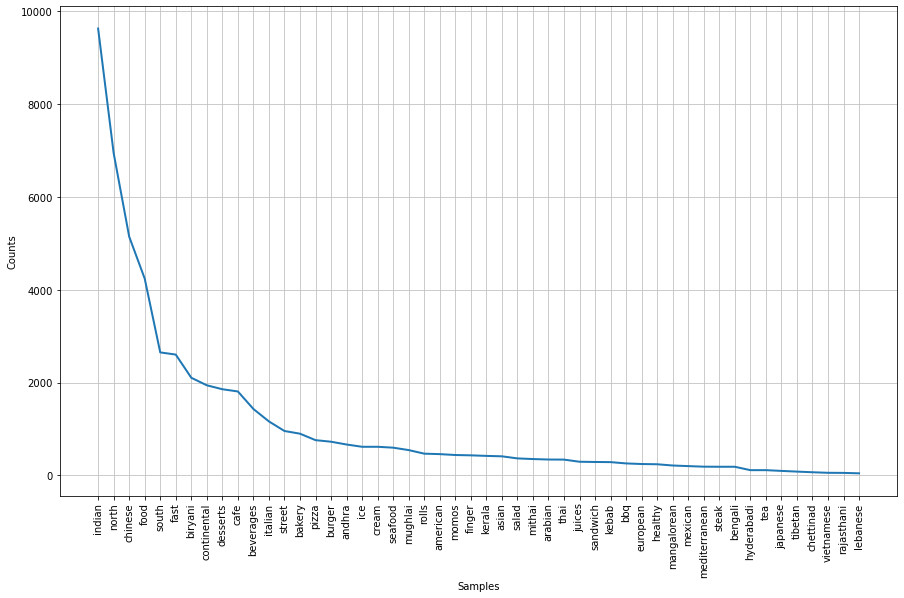

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [113]:
plt.figure(figsize=(15,9))
fd_cuisine.plot(50)

In [114]:
## How to prepare our data for Machine Learning

### Now start applying algo but before that u have to pre-process your data

In [115]:
#newdata.columns

In [116]:
#newdata.dtypes

In [117]:
#### considering "reviews_list", "menu_item", "dish_liked", "cuisines", u can think for predicting rating
### so we can store  ("reviews_list", "menu_item", "dish_liked", "cuisines") in a single feature

In [118]:
# Converting all the text to strings

newdata[["reviews_list", "menu_item", "dish_liked", "cuisines"]] = newdata[["reviews_list", "menu_item", "dish_liked", "cuisines"]].astype("str")

# Combining all the text data into a single feature called "text"
newdata["text"] = newdata["reviews_list"] + " " + newdata["menu_item"] + " " + newdata["dish_liked"] + " " + newdata["cuisines"]

In [119]:
#newdata.head()

In [120]:
# Creating a new dataset with text and restaurant ratings
text_data = newdata[["text", "rating"]]


In [121]:
text_data.head()

,text,rating
0,"[('rated 5.0', ""rated\n had an egg chicken ro...",1
1,"[('rated 4.0', 'rated\n this little cafe is s...",1
2,"[('rated 4.0', 'rated\n this little cafe is s...",1
3,"[('rated 5.0', ""rated\n great service and don...",NaN
4,"[('rated 5.0', ""rated\n great service and don...",NaN


In [122]:
text_data['rating'].unique()

['1', NaN, '0', '2']
Categories (3, object): ['0' < '1' < '2']

In [123]:
from sklearn.preprocessing import LabelEncoder

In [124]:
le=LabelEncoder()

In [125]:
text_data.dropna(inplace=True)

In [126]:
text_data['rating']=le.fit_transform(text_data['rating'])

In [127]:
text_data['rating'].unique()

array([1, 0, 2])

In [128]:
text_data['rating'].dtype

dtype('int32')

    what all things, u have to apply on your text column, basically
    a.lowercase
    b.tokenization
    c.remove stopwords
    d.lemmatization

In [129]:
# Converting text to lowercase
text_data["text"] = text_data["text"].apply(lambda x: x.lower())


import warnings
from warnings import filterwarnings
filterwarnings('ignore')   #to ignore all warnings

In [130]:
text_data.shape

(16391, 2)

In [131]:
df=text_data.sample(n=2000)

In [132]:
df.reset_index(inplace=True)

In [133]:
df.drop('index',axis=1,inplace=True)

In [134]:
df.head()

,text,rating
0,"[('rated 1.0', 'rated\n the worst customer ca...",0
1,"[('rated 5.0', 'rated\n hot dog, pav bhaji, g...",1
2,"[('rated 3.0', 'rated\n ambience was fine... ...",1
3,"[('rated 4.0', 'rated\n i have ordered beef k...",1
4,"[('rated 5.0', ""rated\n this lassi reminds me...",1


In [135]:
df.isnull().sum()

text      0
rating    0
dtype: int64

In [136]:
df.dropna(inplace=True)

In [137]:
df.shape

(2000, 2)

In [138]:
# Tokenizing the text as we have to remove stopwords from data
tokens = df["text"].apply(tokenizer.tokenize) 


In [139]:
type(tokens)

pandas.core.series.Series

In [140]:
print(tokens[0])

['rated', 'rated', 'n', 'the', 'worst', 'customer', 'care', 'services', 'nthe', 'food', 'bought', 'was', 'not', 'hot', 'rated', 'rated', 'n', 'must', 'try', 'once', 'been', 'to', 'this', 'place', 'must', 'try', 'the', 'indian', 'special', 'a', 'quiet', 'catchy', 'garage', 'start', 'up', 'by', 'youngster', 'to', 'start', 'of', 'with', 'a', 'pocket', 'friendly', 'menus', 'nan', 'pizza']


In [141]:
len(tokens)

2000

In [142]:

# Removing stopwords 
tokens = tokens.apply(lambda x: [token for token in x if token not in stop])
#OR
tokens.apply(remove_stopwords)

0       [worst, customer, care, services, nthe, food, ...
1       [hot, dog, pav, bhaji, grilled, sandwich, heav...
2       [ambience, fine, staff, kinda, slow, service, ...
3       [ordered, beef, kothu, parotta, good, one, wud...
4       [lassi, reminds, lassi, delhi, punjab, thick, ...
                              ...                        
1995    [really, good, place, hangout, evening, chicke...
1996    [ordered, home, delivery, nfood, good, deliver...
1997    [nice, place, hangout, kids, one, part, iona, ...
1998                                      [south, indian]
1999    [nice, gygienic, food, usually, crowded, satur...
Name: text, Length: 2000, dtype: object

In [143]:
##How to Lemmatize your data

In [144]:
from nltk.stem import WordNetLemmatizer

In [145]:
wl = WordNetLemmatizer()

In [146]:
print(tokens[0])

['worst', 'customer', 'care', 'services', 'nthe', 'food', 'bought', 'hot', 'must', 'try', 'place', 'must', 'try', 'indian', 'special', 'quiet', 'catchy', 'garage', 'start', 'youngster', 'start', 'pocket', 'friendly', 'menus', 'pizza']


In [147]:
data=tokens[0]

In [148]:
print([wl.lemmatize(word) for word in data])

['worst', 'customer', 'care', 'service', 'nthe', 'food', 'bought', 'hot', 'must', 'try', 'place', 'must', 'try', 'indian', 'special', 'quiet', 'catchy', 'garage', 'start', 'youngster', 'start', 'pocket', 'friendly', 'menu', 'pizza']


In [149]:
# Writing a function to lemmatize words

def lem(text):
    return [wl.lemmatize(word) for word in text]

In [150]:
# Applying the function to each row of the text
# i.e. reducing each word to its lemma

tokens_new = tokens.apply(lem)

type(tokens_new)
tokens_new.head()

0    [worst, customer, care, service, nthe, food, b...
1    [hot, dog, pav, bhaji, grilled, sandwich, heav...
2    [ambience, fine, staff, kinda, slow, service, ...
3    [ordered, beef, kothu, parotta, good, one, wud...
4    [lassi, reminds, lassi, delhi, punjab, thick, ...
Name: text, dtype: object

In [151]:
##Peform Feature encoding on data

In [152]:
df['rating'].unique()

array([0, 1, 2])

In [153]:
df['rating'].dtype

dtype('int32')

In [154]:
df['rating'].value_counts()

1    1376
0     371
2     253
Name: rating, dtype: int64

In [155]:
#label encoder  '0' ->0  (string to numerical)

In [156]:
from sklearn.preprocessing import LabelEncoder

In [157]:
le=LabelEncoder()

In [158]:
df['rating']=le.fit_transform(df['rating'])

In [159]:
#term frequency,inverse document frequency
#TF.IDF->vector representaion
#doc means line
#TF=No of occurence of a word in a doc/Total no of words in that doc
#IDF=log(total no of docs/no of docs containing words)

##   Applying TF-IDF on your text data

In [160]:
print(tokens_new[0])

['worst', 'customer', 'care', 'service', 'nthe', 'food', 'bought', 'hot', 'must', 'try', 'place', 'must', 'try', 'indian', 'special', 'quiet', 'catchy', 'garage', 'start', 'youngster', 'start', 'pocket', 'friendly', 'menu', 'pizza']


In [161]:
' '.join(tokens_new[0])

'worst customer care service nthe food bought hot must try place must try indian special quiet catchy garage start youngster start pocket friendly menu pizza'

In [162]:
tokens_new.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999],
           dtype='int64', length=2000)

In [163]:
## collect entire data into corpus as we have to NLP techniques to this corpus to convert it into some vectors
corpus=[]

for i in tokens_new.index:
    review=' '.join(tokens_new[i])
    corpus.append(review)
#huge corpus file

In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()

In [165]:
X.shape

(2000, 26301)

In [166]:
df['rating'].value_counts()

1    1376
0     371
2     253
Name: rating, dtype: int64

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
# Splitting the data into train and test sets (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, df['rating'], test_size = 0.3, random_state = 0,stratify=df['rating'])

In [169]:
#L=max{sum(sigmoid(yi*wTi*xi))} #sigmoid removes affect of outlier
from sklearn.linear_model import LogisticRegression

In [170]:
lr=LogisticRegression(multi_class='multinomial')

In [171]:
lr.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [172]:
# Make predictions.
predictions =lr.predict(X_test)

In [173]:
# Compute the error.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predictions, y_test))



[[ 11   5   0]
 [100 401  46]
 [  0   7  30]]


In [174]:
from sklearn.metrics import accuracy_score
print(accuracy_score(predictions,y_test))
print('\n')

0.7366666666666667




In [175]:
#fit naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [176]:
### classifier models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))

In [177]:
# Make predictions on validation dataset

for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    
    # Make predictions.
    predictions = model.predict(X_test)

    # Compute the error.
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions,y_test))
    print('\n')

LogisticRegression
[[ 11   5   0]
 [100 401  46]
 [  0   7  30]]
0.7366666666666667


Naive Bayes
[[ 29  54   0]
 [ 68 272  38]
 [ 14  87  38]]
0.565


RandomForest
[[  9   2   0]
 [102 406  47]
 [  0   5  29]]
0.74


Decision Tree
[[ 44  72   4]
 [ 65 302  31]
 [  2  39  41]]
0.645


KNN
[[ 35  51   5]
 [ 73 330  33]
 [  3  32  38]]
0.6716666666666666




In [178]:
### cross validating my Logistic Regression model

In [179]:
from sklearn.model_selection import cross_val_score

In [180]:
lr = LogisticRegression()
print(cross_val_score(lr, X, df['rating'], cv=5, scoring ='accuracy').mean())

0.732
